In [1]:
# Necessary imports
import itertools
import json
import numpy as np
import matplotlib.pyplot as plt
from cribbage import *

%matplotlib inline

In [2]:
deck = MakeDeck()
game = Cribbage()
crib_scores = {i: 0 for i in deck}

## Cribbing analysis

When players are choosing what cards to discard into their crib, there are good and bad choices. Adding a 5 is a good choice, for example, as 10-value cards are the most common and the player will likely score on 15s. The player who owns the crib wants to maximise this score, and the other player wants to minimise this. 

Since the number of hands is fairly small - $ {52 \choose 5} = 2598960 $ - we can work out the value of adding any card to the crib by going through each hand and taking the sum of the scores of every hand each card appears in.

In [3]:
# Precomputing the value of every card in the crib
print(f"Number of hands: {len(tuple(itertools.combinations(deck, 5)))}")
for c, i in enumerate(itertools.combinations(deck, 5)):
    # Progress Check
    if c % 500000 == 0:
        print(f"Progress: {c}")
    x = list(i)
    score = game.ScoreHand(x)
    for j in i:
        crib_scores[j] += score
print("Done")

Number of hands: 2598960
Progress: 0
Progress: 500000
Progress: 1000000
Progress: 1500000
Progress: 2000000
Progress: 2500000
Done


In [4]:
# Writing this to a JSON file for future use to inform cribbing choices in games
with open("cribscores.json", "w") as file:
    file.write(json.dumps(crib_scores))

In [5]:
# Somehow the 5 of spades is the best card ?? 
maximum = max(crib_scores, key=lambda k: crib_scores[k])
minimum = min(crib_scores, key=lambda k: crib_scores[k])

print("Best Cards: ")
for k, v in crib_scores.items():
    if v == crib_scores[maximum]:
        print(k)

print("\n\nWorst Cards: ")
for k, v in crib_scores.items():
    if v == crib_scores[minimum]:
        print(k)


Best Cards: 
5S


Worst Cards: 
KS
KH
KC
KD


In [6]:
# Finding the top and bottom 10 
sorted_scores = sorted(crib_scores.items(), key=lambda x: x[1])
print("Top 10 cards: ")
for i in reversed(sorted_scores[-10:]):
    print(i[0])

print("\n\nWorst Scores: ")
for i in sorted_scores[:10]:
    print(i[0])

Top 10 cards: 
5S
5H
5C
5D
JD
JC
JH
JS
4S
4H


Worst Scores: 
KS
KH
KC
KD
QD
QC
QH
QS
10S
10H


In [6]:
# Ranking all the cards in order
with open("cribscores.json", "r") as file:
    scores = json.loads(file.read())
scores = sorted(scores.items(), key=lambda x:x[1])

for i in reversed(scores):
    print(i[0])

5S
5H
5C
5D
JD
JC
JH
JS
4S
4H
4C
4D
3S
3H
3C
3D
6S
6H
6C
6D
2S
2H
2C
2D
7S
7H
7C
7D
8D
8S
8C
8H
AS
AH
AC
AD
9D
9C
9H
9S
10D
10C
10H
10S
QS
QH
QC
QD
KD
KC
KH
KS


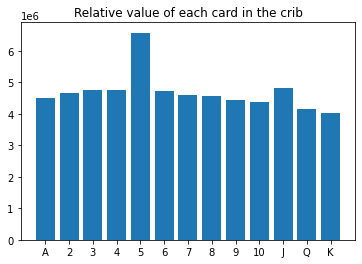

In [7]:
total_scores = [0 for i in range(13)]
for card in scores:
    card_val = card[0][:-1]
    if card_val == "A":
        total_scores[0] += card[1]
    elif card_val == "J":
        total_scores[10] += card[1]
    elif card_val == "Q":
        total_scores[11] += card[1]
    elif card_val == "K":
        total_scores[12] += card[1]
    else:
        total_scores[int(card_val) - 1] += card[1]
    
total_scores = np.array(total_scores)
values = [str(i) for i in range(1, 14)]
values[0], values[10], values[11], values[12] = "A", "J", "Q", "K"

plt.title("Relative value of each card in the crib")
plt.bar(values, total_scores)
plt.show()

### Summary of Cribbing strategy
We can see from this list that the 5s and Jacks are the best cards to have in your crib, and the high cards (Kings, Queens and 10s) are the worst. This is fairly easy to explain, as 5s will score a lot of points on 15s and Jacks will score a lot of *"One for his knob"* points. Kings and Queens also have the least run associated with them, because they are at the end of order (Aces are low and can't be used to make a run with the King). Cards around the middle like 6s and 7s fall to around the middle of desiribility. 

As a human player, this data shows that as a general rule of thumb, you want to play the highest card that is not a Jack and that doesn't detriment your hand to your opponent's crib so they probably score the least points and you would want to play 5s and Jacks to your own crib. In general the lower cards are useful, but are generally quite average due to not having special rules like the Jack or the chance to score high like the 5. 

The JSON data gathered will be quite useful when simulating games of cribbage since it shows the bot's cribbing strategy. Choose the card that detriments your hand the least from the start of the list if it is your crib and from the end if it is your opponent's crib. 